In [14]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
import pylab as pl

In [15]:
n = 51
x = np.linspace(0,5,n) # 51 points between 0 and 5
y = 3*x
pred = y + np.random.normal(0,1,n) # add some noise

In [16]:
MSE = sum((y - pred)**2)/n # Mean Squared Error 
print(MSE)

0.9158323849007061


In [17]:
cor = np.corrcoef(y,pred) # Correlation coefficient
print(cor[0,1])

0.9776798945310828


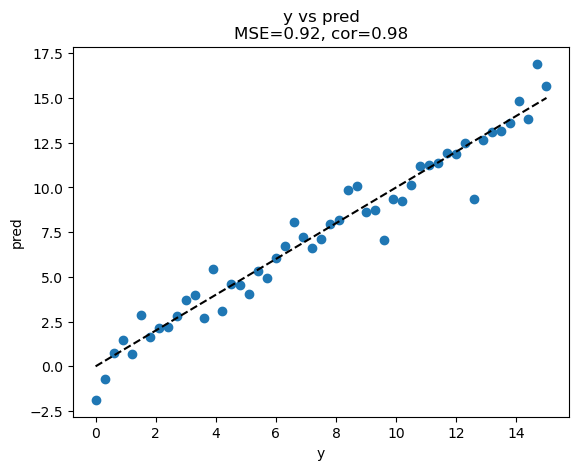

In [18]:
#plot y vs pred
#add to plot information about MSE and correlation 
# and add line with correlation value
plt.scatter(y,pred)
plt.xlabel('y')
plt.ylabel('pred')
plt.title('y vs pred\nMSE={:.2f}, cor={:.2f}'.format(MSE,cor[0,1]))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()

In [19]:
# ROC curve
n = 100
p = 5
L = 15

labels = np.repeat(0, n)
#from random import sample
idx = list(np.linspace(1,L,L, dtype=int))
idx = sample(idx, p)
labels[idx]=1

scores = np.sort(np.random.normal(0,1,n))
scores = scores[::-1]


In [20]:
# Limitations of accuracy. Matthew Correlation
n = 1000
p = 100
L = 50
actual = np.repeat(0, n) # actual values
pred = np.repeat(0, n) # predicted values
actual[0:p] = 1 # first p are positive

idx = list(np.linspace(1,(p + L),(p+ L), dtype=int)) # possible indices to be set to 1
idx = sample(idx, L)
pred[idx]=1
acc1 = sum(actual==pred)/n
print(acc1)

MC1 = matthews_corrcoef(actual, pred)
print(MC1)

0.918
0.44353708548308607


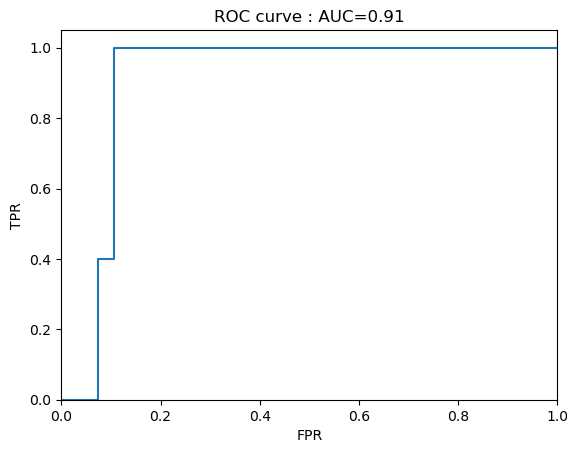

In [21]:

fpr, tpr, thresholds = metrics.roc_curve(labels, scores)
roc_auc = metrics.auc(fpr, tpr)
pl.clf()
pl.plot(fpr, tpr, label='ROC curve')
pl.xlabel('FPR')
pl.ylabel('TPR')
pl.title('ROC curve : AUC=%0.2f' % roc_auc)
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.show()

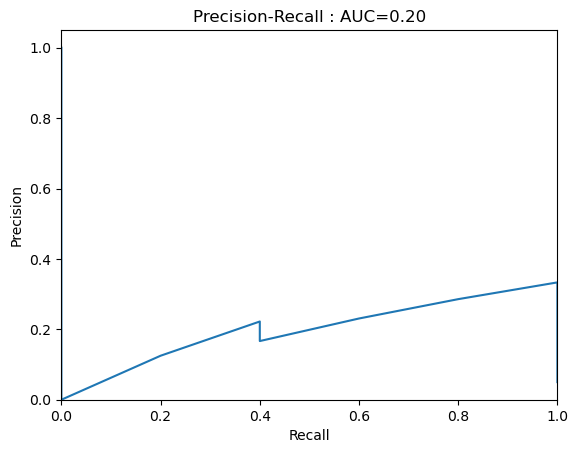

In [22]:
precision, recall, thresholds = metrics.precision_recall_curve(labels, scores)
area= metrics.auc(recall, precision)
pl.clf()
pl.plot(recall, precision, label='Precision-Recall curve')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.title('Precision-Recall : AUC=%0.2f' % area)
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.show()

In [23]:
# bais-variance tradeoff
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import random

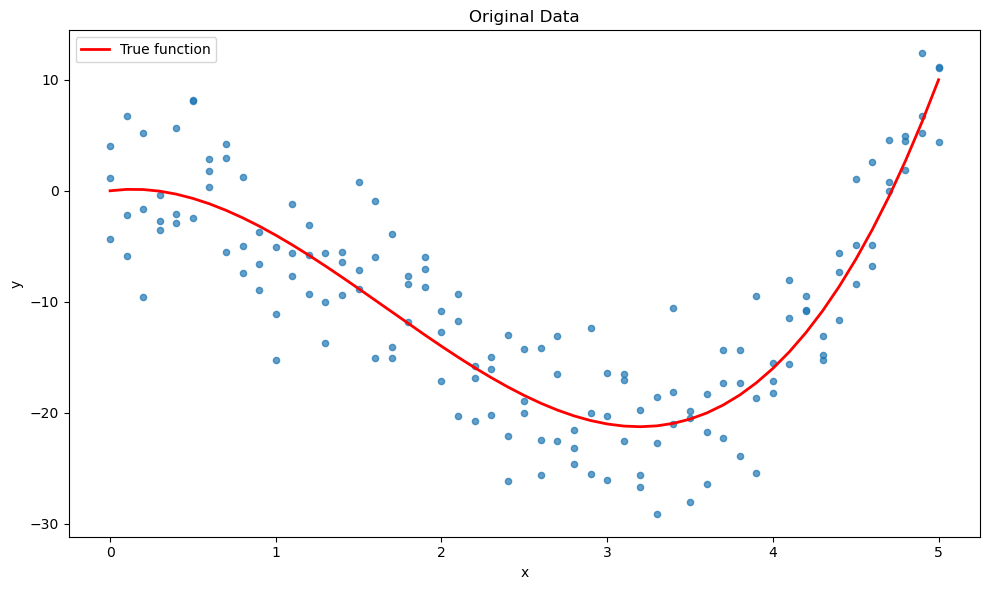

In [24]:
np.random.seed(123)
random.seed(123)

# Generate data
x = np.arange(0, 5.1, 0.1)
x = np.repeat(x, 3)
y = 0 + 2*x - 7.5*x**2 + 1.5*x**3 + np.random.normal(0, 4, len(x))

# True function
true_y = 0 + 2*x - 7.5*x**2 + 1.5*x**3

# Plot 1: Original data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, alpha=0.7)
plt.plot(x, true_y, 'r-', linewidth=2, label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data')
plt.legend()
plt.tight_layout()
plt.show()

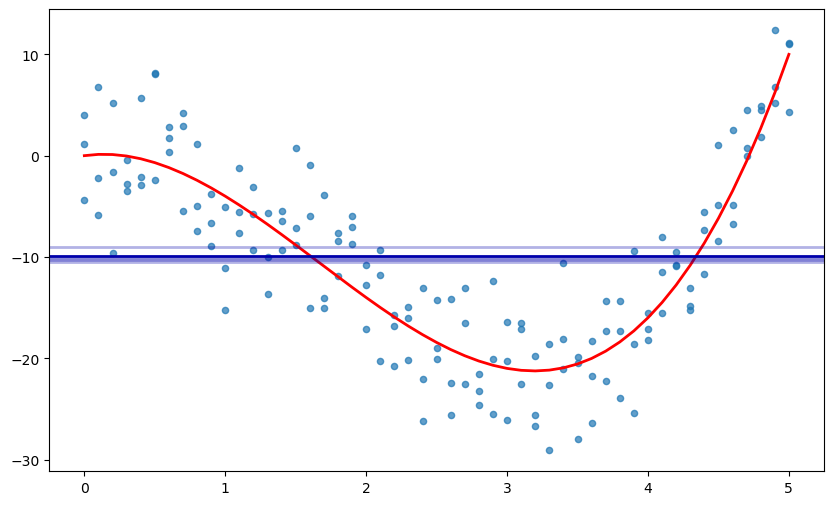

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, alpha=0.7)
plt.plot(x, true_y, 'r-', linewidth=2, label='True function')

iix_test = random.sample(range(len(x)), 100)
my_prediction = np.mean(y[iix_test])
plt.axhline(y=my_prediction, color='#0000AA', linewidth=2, label='Mean prediction 1')

k = 0
while k < 5:
    iix_test = random.sample(range(len(x)), 100)
    my_prediction = np.mean(y[iix_test])
    plt.axhline(y=my_prediction, color='#0000AA', linewidth=2, alpha=0.3, label='Mean prediction 2')
    k += 1


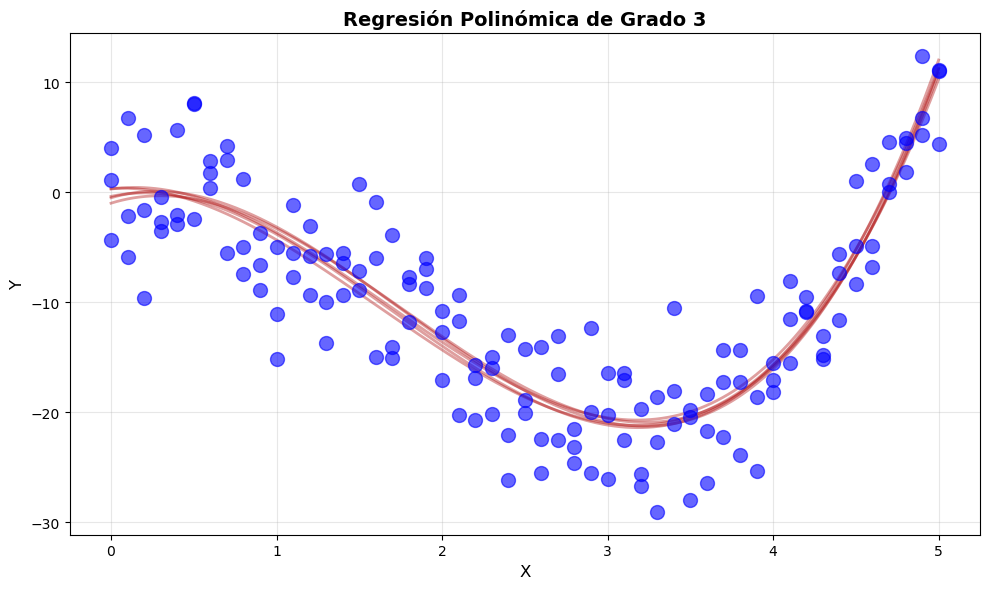

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
k = 0
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', s=100, alpha=0.6, label='Datos originales', zorder=3)
while k < 5:
    #get 100 random values of x
    iix_train = random.sample(range(len(x)), 100)
    x_train = x[iix_train]
    y_train = y[iix_train]

    # sort x_train and y_train by x_train
    sorted_idx = np.argsort(x_train)
    x_train_sorted = x_train[sorted_idx]
    y_train_sorted = y_train[sorted_idx]

    poly_features = PolynomialFeatures(degree=3)
    x_poly = poly_features.fit_transform(x_train_sorted.reshape(-1, 1))

    modelo = LinearRegression()
    modelo.fit(x_poly, y_train_sorted)

    x_curva = np.linspace(x.min(), x.max(), 300)
    x_curva_reshaped = x_curva.reshape(-1, 1)
    x_curva_poly = poly_features.transform(x_curva_reshaped)
    y_predicha = modelo.predict(x_curva_poly)

    coeficientes = modelo.coef_
    intercepto = modelo.intercept_

    plt.plot(x_curva, y_predicha, color='#AA000060', linewidth=2, label='Polinomio de grado 3', zorder=2)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.title('Regresión Polinómica de Grado 3', fontsize=14, fontweight='bold')
    #plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    k = k + 1
plt.show()

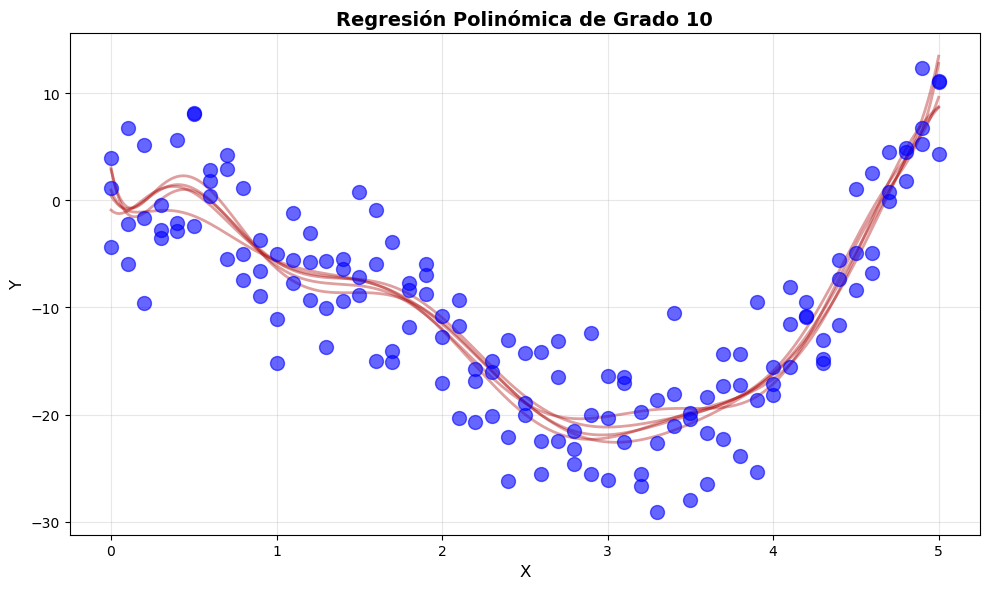

In [31]:
k = 0
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', s=100, alpha=0.6, label='Datos originales', zorder=3)

while k < 5:
    #get 100 random values of x
    iix_train = random.sample(range(len(x)), 100)
    x_train = x[iix_train]
    y_train = y[iix_train]

    # sort x_train and y_train by x_train
    sorted_idx = np.argsort(x_train)
    x_train_sorted = x_train[sorted_idx]
    y_train_sorted = y_train[sorted_idx]

    poly_features = PolynomialFeatures(degree=10
                                       )
    x_poly = poly_features.fit_transform(x_train_sorted.reshape(-1, 1))

    modelo = LinearRegression()
    modelo.fit(x_poly, y_train_sorted)

    x_curva = np.linspace(x.min(), x.max(), 300)
    x_curva_reshaped = x_curva.reshape(-1, 1)
    x_curva_poly = poly_features.transform(x_curva_reshaped)
    y_predicha = modelo.predict(x_curva_poly)

    coeficientes = modelo.coef_
    intercepto = modelo.intercept_

    plt.plot(x_curva, y_predicha, color='#AA000060', linewidth=2, label='Polinomio de grado 3', zorder=2)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.title('Regresión Polinómica de Grado 10', fontsize=14, fontweight='bold')
    #plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    k = k + 1
plt.show()